In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Regression Data Preparation

First let's map the main archetypes to the post through the topic.

In [2]:
doc2topic = pd.read_csv('doc2topic.csv')[['Document', 'Topic', 'Representation', 'Representative_Docs']]
doc2topic

,Document,Topic,Representation,Representative_Docs
0,two polaroid photographs the one one the right...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
1,kamala harris is speaking at a rally and her s...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
2,the sharer posted a video showing her reacting...,31,"['crowd', 'video', 'billions', 'attending', 'g...",['it is a video of kamala harris coming off a ...
3,the video shows donald trump mike pence and li...,9,"['drag', 'queen', 'mike', 'pence', 'figures', ...","['mitch mcconnell as a drag queen', 'ted cruz ..."
4,aoc announcing her opinions with regards to ho...,25,"['aoc', 'video', 'joe', 'biden', 'discussing',...",['its a video of a reporter sharing an ai vide...
...,...,...,...,...
709,donald trump and elon musk are sitting talking...,0,"['elon', 'musk', 'dancing', 'are', 'and', 'don...","['elon and trump are dancing', 'it is a video ..."
710,donald trump is riding a horse with eagle wing...,20,"['horse', 'goat', 'knights', 'castle', 'riding...",['donald trump is riding a horse with eagle wi...
711,it is a picture of kamala harris shaking hands...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...
712,it is an image of barack obamas face in front ...,2,"['african', 'black', 'republican', 'hat', 'dep...",['former president donald trump with his arms ...


In [3]:
topic2archetype = pd.read_csv('narrative_topics_reind.csv')[['Topic', 'Dominant_Archetype', 'Dominant_Actor']]
topic2archetype

,Topic,Dominant_Archetype,Dominant_Actor
0,15,Scandal Fabrication,Kamala Harris
1,1,Character Caricature,Kamala Harris
2,34,Ideological Demonization,Kamala Harris
3,36,Ideological Demonization,Kamala Harris
4,26,Ideological Demonization,Kamala Harris
5,10,Ideological Demonization,Donald Trump
6,7,Ideological Demonization,Kamala Harris
7,33,Ideological Demonization,Kamala Harris
8,17,Ideological Demonization,Kamala Harris
9,35,Scandal Fabrication,Hilary Clinton


In [4]:
# Turn all rows of topic2archetype where Dominant_Actor is not either 'Donald Trump' or 'Kamala Harris' to 'Others'

topic2archetype.loc[~topic2archetype['Dominant_Actor'].isin(['Donald Trump', 'Kamala Harris']), 'Dominant_Actor'] = 'Others'

In [5]:
df_arc = doc2topic.merge(topic2archetype, on='Topic')
df_arc

,Document,Topic,Representation,Representative_Docs,Dominant_Archetype,Dominant_Actor
0,two polaroid photographs the one one the right...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others,Others
1,kamala harris is speaking at a rally and her s...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others,Others
2,the sharer posted a video showing her reacting...,31,"['crowd', 'video', 'billions', 'attending', 'g...",['it is a video of kamala harris coming off a ...,Scandal Fabrication,Donald Trump
3,the video shows donald trump mike pence and li...,9,"['drag', 'queen', 'mike', 'pence', 'figures', ...","['mitch mcconnell as a drag queen', 'ted cruz ...",Character Caricature,Others
4,aoc announcing her opinions with regards to ho...,25,"['aoc', 'video', 'joe', 'biden', 'discussing',...",['its a video of a reporter sharing an ai vide...,Scandal Fabrication,Donald Trump
...,...,...,...,...,...,...
709,donald trump and elon musk are sitting talking...,0,"['elon', 'musk', 'dancing', 'are', 'and', 'don...","['elon and trump are dancing', 'it is a video ...",Public Endorsement,Donald Trump
710,donald trump is riding a horse with eagle wing...,20,"['horse', 'goat', 'knights', 'castle', 'riding...",['donald trump is riding a horse with eagle wi...,Character Caricature,Donald Trump
711,it is a picture of kamala harris shaking hands...,-1,"['of', 'is', 'the', 'donald', 'an', 'and', 'tr...",['it is an image of kamala harris speaking out...,Others,Others
712,it is an image of barack obamas face in front ...,2,"['african', 'black', 'republican', 'hat', 'dep...",['former president donald trump with his arms ...,Public Endorsement,Donald Trump


In [6]:
df_all = pd.read_csv('data-2324-no-ver.csv')
df_all

,Unnamed: 0,incident_id,report_id,date_coded,url,file,screenshot,date_posted,format,transcript,...,text_around_deepfake,harm_evidence,communication_goal,core_frame,hero,villain,plot,moral,domain,year
0,0,203,17,2024-02-12,https://twitter.com/DouglasLucas/status/171631...,Screenshot 2024-02-12 at 12.47.24 PM.png (http...,NaN,2023-10-23,image,NaN,...,AI and the end of photographic truth? Deceptiv...,political_interference,education,human_interest,Joe Biden,Putin,Putin and Biden hugging,U.S. and Russian leaders can get along,twitter.com,2023.0
1,1,186,18,2024-02-04,https://twitter.com/21WIRE/status/165300993699...,"""Patrick Henningsen on X_ _⭕️ Granted, this mu...",NaN,2023-05-01,video,"""Today is today, and yesterday was today yeste...",...,"⭕️ Granted, this must be a deep fake, but rega...",non_identifiable,"satire,entertainment,harm_reputation",human_interest,A Leader Who Sounds Smart and Capable During S...,Kamala Harris Rambling and Not Making Sense Du...,"Kamala's speech does not make sense, which lea...",Kamala Harris's credibility as VP should be qu...,twitter.com,2023.0
2,2,187,19,2024-02-05,https://www.facebook.com/reel/894486844951526,deepfake 19.html (https://v5.airtableuserconte...,NaN,2023-05-03,video,"“Today is today, and yesterday is today yester...",...,"""Our VP: 'I can only hit this bong 1 more time...",other,"satire,entertainment,harm_reputation",human_interest,Intelligent Manner. and People Expect That A C...,Online Users Believe That Harris Is A Rambler.,Kamala Harris is shown to be giving a speech t...,Kamala Harris is portrayed as being unable to ...,www.facebook.com,2023.0
3,3,188,20,2024-02-05,https://twitter.com/JebraFaushay/status/165937...,Deepfake 20.html (https://v5.airtableuserconte...,NaN,2023-05-18,video,"""Excuse me, excuse me. I need everyone in the ...",...,Is this real? I feel like it might be a deep f...,other,"satire,entertainment,harm_reputation","conflict,human_interest",His Squad To Dress In Drag. and The Freedom Fo...,Republicans Who Want To Ban Drag.,"Republicans want to ban drag, but Donald Trump...",Republicans should stop calling for drag to be...,twitter.com,2023.0
4,4,201,25,2024-02-09,https://twitter.com/JackPosobiec/status/163383...,Screenshot 2024-02-09 134519.png (https://v5.a...,NaN,2023-03-09,video,I'll tell you something the deepfake that Jack...,...,"""The deepfake that Jack Posobiec made of Presi...",political_interference,"entertainment,harm_political_interference,acti...","responsibility,conflict","Poso'S Supposters, Those Who Share His Ideology","Aoc, and Other Related Gov. Officials Who Shar...",Biden and AOC do not understand how to priorit...,we must take a stand against their choices to ...,twitter.com,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,709,1058,460,2025-03-06,https://x.com/PlanetOfMemes/status/18240700394...,460.png (https://v5.airtableusercontent.com/v3...,Screenshot 2025-03-05 at 8.45.11 PM.png (https...,2024-08-15,image,NaN,...,"The caption says ""Let's do some weekly spaces""",non_identifiable,"boost_reputation,entertainment",human_interest,Donald Trump and Elon Musk,NaN,Trump and Musk are friends,Donald Trump and Elon Musk are a good team,x.com,2024.0
710,710,1059,599,2025-03-06,https://x.com/KryptoKarma2024/status/182516139...,599.png (https://v5.airtableusercontent.com/v3...,Screenshot 2025-03-06 at 3.01.04 PM.png (https...,2024-08-18,image,NaN,...,"The caption says ""@realDonaldTrump\n $RDT CTO ...",political_interference,"boost_reputation,harm_political_interference",human_interest,Donald Trump,Kamala Harris,The 2024 presidential election,Vote for Donald Trump,x.com,2024.0
711,711,1060,757,2025-03-06,https://x.com/Trump_History45/status/183139475...,pdid 757.jpg (https://v5.airtableusercontent.c...,Screen Shot 2025-03-06 at 3.17.43 PM.png (http...,2024-09-04,image,NaN,...,A young Kamala Harris shaking hands with commu...,political_interference,"false_info,harm_political_interference,harm_re.

In [7]:
df_all.domain.value_counts()

,count
domain,
x.com,499
twitter.com,106
www.tiktok.com,32
miro.medium.com,16
farid.berkeley.edu,12
www.youtube.com,9
www.facebook.com,9
truthsocial.com,4
www.reddit.com,3


Let's focus on Twitter/X as a case study for engagement (wouldn't make sense if we're regressing across different platforms)

In [8]:
#Filter on domain x.com or twitter.com
df_all = df_all[df_all.domain.isin(['twitter.com', 'x.com'])]
len(df_all)

605

In [9]:
df_all.columns

Index(['Unnamed: 0', 'incident_id', 'report_id', 'date_coded', 'url', 'file',
       'screenshot', 'date_posted', 'format', 'transcript', 'summary_content',
       'type', 'comment_type', 'sharer_faketype', 'external_verification',
       'links_verification', 'evidence_fake', 'watermark', 'likes', 'views',
       'comments', 'shares', 'original_source_name', 'original_source_type',
       'original_source_actor_type', 'original_source_country', 'sharer_name',
       'sharer_type', 'sharer_job', 'high_impact_comment', 'sharer_country',
       'sharer_city', 'target_name', 'target_one_name', 'target_one_sentiment',
       'target_one_type_macro', 'target_one_type_micro', 'target_one_country',
       'target_two_name', 'target_two_sentiment', 'target_two_type_macro',
       'target_two_type_micro', 'target_two_country', 'target_type_macro',
       'target_type_micro', 'target_country', 'deepfake_content_depicts',
       'harm_depicted', 'social_policy_sector', 'context_deepfake',
       

Engagement metrics:

In [30]:
df_eng = df_all[['incident_id', 'likes', 'views', 'shares', 'comments']]
df_eng

,incident_id,likes,views,shares,comments
0,203,1,219,1,1
1,186,54,7852,22,12
3,188,55,14.3K,10,25
4,201,6.1k,2.3M,1.4k,1.4k
20,117,5.5K,NaN,1.3K,136
...,...,...,...,...,...
709,1058,687,92.9k,33,16
710,1059,5,827,1,0
711,1060,598,34.5K,72,44
712,1061,260,16.2K views,29,32


Okay these engagement data needs some cleaning.
Observation:
* Some values use suffixes like K (thousands), M (millions).
* Some entries (e.g., views) include strings like "16.2K views".
* There are NaN values.

In [31]:
def convert_engagement_value(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return val
    val = str(val).strip().lower().replace("views", "").strip()

    multiplier = 1
    if val.endswith('k'):
        multiplier = 1_000
        val = val[:-1]
    elif val.endswith('m'):
        multiplier = 1_000_000
        val = val[:-1]

    try:
        return float(val.replace(",", "")) * multiplier
    except:
        return np.nan

def clean_engagement_data(df, columns=['likes', 'views', 'shares', 'comments']):
    for col in columns:
        df[col] = df[col].apply(convert_engagement_value)
    return df

In [36]:
df_eng_cleaned = clean_engagement_data(df_eng)
print(df_eng_cleaned.drop(columns=['incident_id'], axis=1).describe())

              likes         views         shares      comments
count  4.980000e+02  5.890000e+02     452.000000    492.000000
mean   1.357681e+04  1.120366e+06    2310.267699    579.349593
std    1.047232e+05  9.086042e+06   16582.043589   4274.096203
min    0.000000e+00  2.000000e+00       0.000000      0.000000
25%    6.250000e+00  7.340000e+02       1.750000      1.000000
50%    7.150000e+01  6.313000e+03      14.000000      5.000000
75%    7.575000e+02  4.800000e+04      90.750000     27.000000
max    1.200000e+06  1.587000e+08  174000.000000  58000.000000


In [13]:
df_eng_cleaned

,likes,views,shares,comments
0,1.0,219.0,1.0,1.0
1,54.0,7852.0,22.0,12.0
3,55.0,14300.0,10.0,25.0
4,6100.0,2300000.0,1400.0,1400.0
20,5500.0,NaN,1300.0,136.0
...,...,...,...,...
709,687.0,92900.0,33.0,16.0
710,5.0,827.0,1.0,0.0
711,598.0,34500.0,72.0,44.0
712,260.0,16200.0,29.0,32.0


In [69]:
df_reg1 = df_eng_cleaned[['incident_id', 'likes', 'views', 'shares', 'comments']].merge(
    df_arc[['Dominant_Actor', 'Dominant_Archetype']],
    left_index=True,
    right_index=True
)
df_reg1

,incident_id,likes,views,shares,comments,Dominant_Actor,Dominant_Archetype
0,203,1.0,219.0,1.0,1.0,Others,Others
1,186,54.0,7852.0,22.0,12.0,Others,Others
3,188,55.0,14300.0,10.0,25.0,Others,Character Caricature
4,201,6100.0,2300000.0,1400.0,1400.0,Donald Trump,Scandal Fabrication
20,117,5500.0,NaN,1300.0,136.0,Others,Others
...,...,...,...,...,...,...,...
709,1058,687.0,92900.0,33.0,16.0,Donald Trump,Public Endorsement
710,1059,5.0,827.0,1.0,0.0,Donald Trump,Character Caricature
711,1060,598.0,34500.0,72.0,44.0,Others,Others
712,1061,260.0,16200.0,29.0,32.0,Donald Trump,Public Endorsement


In [70]:
# Load data with visual features from Yas and Vitt
df_viz = pd.read_csv('dataset_finale_con_dummies_cleaned.csv')
df_viz.columns

Index(['Unnamed: 0', 'report_id', 'date_coded', 'url', 'file', 'screenshot',
       'date_posted', 'format', 'transcript', 'summary_content', 'type',
       'comment_type', 'sharer_faketype', 'external_verification',
       'links_verification', 'evidence_fake', 'watermark', 'likes', 'views',
       'comments', 'shares', 'original_source_name', 'original_source_type',
       'original_source_actor_type', 'original_source_country', 'sharer_name',
       'sharer_type', 'sharer_job', 'high_impact_comment', 'sharer_country',
       'sharer_city', 'target_name', 'target_one_name', 'target_one_sentiment',
       'target_one_type_macro', 'target_one_type_micro', 'target_one_country',
       'target_two_name', 'target_two_sentiment', 'target_two_type_macro',
       'target_two_type_micro', 'target_two_country', 'target_type_macro',
       'target_type_micro', 'target_country', 'deepfake_content_depicts',
       'harm_depicted', 'social_policy_sector', 'context_deepfake',
       'text_around_de

In [79]:
df_viz = df_viz[['incident_id', 'symbol_rainbow_pride_flag', 'symbol_army',
       'symbol_american_flag', 'symbol_communist_symbol', 'symbol_prisoner',
       'symbol_police', 'is_kept_image', 'dominant_emotion']]
df_reg2 = df_viz[df_viz['is_kept_image']==True]
df_reg2 = df_reg2.drop(columns=['is_kept_image'])

In [80]:
df_reg2.dominant_emotion.value_counts(dropna=False)

,count
dominant_emotion,
anger,118
happiness,59
NaN,40
sadness,40
neutral,32
surprise,22
disgust,8
fear,2


"NaN" is when no face detected, so we will treat it as no emotion together with "neutral". Also format the text (capitalize) to make it better for visualization later.

In [81]:
df_reg2['dominant_emotion'] = df_reg2['dominant_emotion'].replace(['neutral', np.nan], 'None')
df_reg2['dominant_emotion'] = df_reg2['dominant_emotion'].str.capitalize()

For symbols, it's actually alr converted to dummies, but we didn't do for the others yet... So for now we convert back to string to fit out pipeline.

In [82]:
# List of dummy columns for symbols
symbol_cols = ['symbol_rainbow_pride_flag', 'symbol_army',
               'symbol_american_flag', 'symbol_communist_symbol',
               'symbol_prisoner', 'symbol_police']

# Mapping from dummy column name to desired string representation
symbol_map = {
    'symbol_rainbow_pride_flag': 'Rainbow Pride Flag',
    'symbol_army': 'Army',
    'symbol_american_flag': 'American Flag',
    'symbol_communist_symbol': 'Communist Symbol',
    'symbol_prisoner': 'Prisoner',
    'symbol_police': 'Police'
}

# Function to determine the dominant symbol
def get_dominant_symbol(row):
  active_symbols = [symbol_map[col] for col in symbol_cols if row[col] == 1]
  if not active_symbols:
    return 'None'
  # If multiple symbols are present, we can choose the first one or combine them.
  # For this task, let's just take the first one if multiple are present.
  return active_symbols[0]

In [85]:
# Apply the function to create the 'dominant_symbol' column
df_reg2['dominant_symbol'] = df_reg2.apply(get_dominant_symbol, axis=1)

# Drop the original dummy columns if you no longer need them
df_reg2 = df_reg2.drop(columns=symbol_cols)

In [87]:
df_reg2.head()

,incident_id,dominant_emotion,dominant_symbol
23,121,Anger,Police
24,122,None,Police
25,123,Anger,Police
27,124,None,None
28,125,None,Police


In [89]:
df_reg = df_reg1.merge(df_reg2, on='incident_id')
df_reg.columns = [col.lower() for col in df_reg.columns] # just to make the naming format consistent
df_reg

,incident_id,likes,views,shares,comments,dominant_actor,dominant_archetype,dominant_emotion,dominant_symbol
0,121,39000.0,3300000.0,5000.0,230.0,Donald Trump,Character Caricature,Anger,Police
1,122,39000.0,3300000.0,5000.0,230.0,Donald Trump,Character Caricature,None,Police
2,123,39000.0,3300000.0,5000.0,230.0,Donald Trump,Character Caricature,Anger,Police
3,124,309.0,53500.0,52.0,2.0,Donald Trump,Character Caricature,None,None
4,125,309.0,53500.0,52.0,2.0,Donald Trump,Character Caricature,None,Police
...,...,...,...,...,...,...,...,...,...
278,1054,1200.0,43000.0,197.0,39.0,Others,Others,Anger,None
279,1059,5.0,827.0,1.0,0.0,Donald Trump,Character Caricature,None,None
280,1060,598.0,34500.0,72.0,44.0,Others,Others,Surprise,None
281,1061,260.0,16200.0,29.0,32.0,Donald Trump,Public Endorsement,Sadness,None


**TODO:** Fix this to have real data once got from Yasmine.

In [37]:
df_reg.columns = [col.lower() for col in df_reg.columns]
df_reg['dominant_sentiment'] = np.random.choice(['Happy', 'Sad', 'Angry', 'Neutral'], size=len(df_reg))
df_reg['dominant_symbol'] = np.random.choice(["Communism", "Peace", "Police", "None"], size=len(df_reg))
df_reg

,dominant_actor,dominant_archetype,likes,views,shares,comments,dominant_sentiment,dominant_symbol
0,Others,Others,1.0,219.0,1.0,1.0,Happy,Peace
1,Others,Others,54.0,7852.0,22.0,12.0,Sad,None
3,Others,Character Caricature,55.0,14300.0,10.0,25.0,Sad,Peace
4,Donald Trump,Scandal Fabrication,6100.0,2300000.0,1400.0,1400.0,Angry,Peace
20,Others,Others,5500.0,NaN,1300.0,136.0,Happy,None
...,...,...,...,...,...,...,...,...
709,Donald Trump,Public Endorsement,687.0,92900.0,33.0,16.0,Angry,None
710,Donald Trump,Character Caricature,5.0,827.0,1.0,0.0,Angry,Communism
711,Others,Others,598.0,34500.0,72.0,44.0,Angry,Police
712,Donald Trump,Public Endorsement,260.0,16200.0,29.0,32.0,Sad,None


Now we can finally do regression!!

# Regression Analysis

We have views, likes, shares and comments. Let's start with likes first, since it seems to be one of the most common metric.

In [92]:
df_reg_like = df_reg.drop(columns=['views', 'shares', 'comments'], axis=1)
df_reg_like = df_reg_like[df_reg_like['likes'].notna() & (df_reg_like['likes'] > 0)]
df_reg_like

,incident_id,likes,dominant_actor,dominant_archetype,dominant_emotion,dominant_symbol
0,121,39000.0,Donald Trump,Character Caricature,Anger,Police
1,122,39000.0,Donald Trump,Character Caricature,None,Police
2,123,39000.0,Donald Trump,Character Caricature,Anger,Police
3,124,309.0,Donald Trump,Character Caricature,None,None
4,125,309.0,Donald Trump,Character Caricature,None,Police
...,...,...,...,...,...,...
278,1054,1200.0,Others,Others,Anger,None
279,1059,5.0,Donald Trump,Character Caricature,None,None
280,1060,598.0,Others,Others,Surprise,None
281,1061,260.0,Donald Trump,Public Endorsement,Sadness,None


Define reference of each attribute for regression

In [94]:
reference_mapping = {
    'dominant_actor': 'Others',
    'dominant_archetype': 'Others',
    'dominant_emotion': 'None',
    'dominant_symbol': 'None'
}

# Print category distributions
print("Category Distributions:")
for col in ['dominant_actor', 'dominant_archetype', 'dominant_emotion', 'dominant_symbol']:
    print(f"\n{col}:")
    print(df_reg_like[col].value_counts())

Category Distributions:

dominant_actor:
dominant_actor
Donald Trump     127
Others            60
Kamala Harris     41
Name: count, dtype: int64

dominant_archetype:
dominant_archetype
Scandal Fabrication         64
Character Caricature        53
Others                      53
Public Endorsement          37
Ideological Demonization    21
Name: count, dtype: int64

dominant_emotion:
dominant_emotion
Anger        88
None         54
Happiness    40
Sadness      27
Surprise     14
Disgust       5
Name: count, dtype: int64

dominant_symbol:
dominant_symbol
None                  156
Prisoner               24
Communist Symbol       15
Police                 14
Army                    8
American Flag           8
Rainbow Pride Flag      3
Name: count, dtype: int64


Create dummy variables with specified reference categories and transform likes

In [95]:
# Transform likes using log2 (add 1 to handle any zeros)
df_reg_like['log2_likes'] = np.log2(df_reg_like['likes'] + 1)

print(f"Likes transformation summary:")
print(f"Original likes - Min: {df_reg_like['likes'].min():.0f}, Max: {df_reg_like['likes'].max():.0f}, Median: {df_reg_like['likes'].median():.0f}")
print(f"Log2 likes - Min: {df_reg_like['log2_likes'].min():.2f}, Max: {df_reg_like['log2_likes'].max():.2f}, Median: {df_reg_like['log2_likes'].median():.2f}")

# Create dummy variables for each categorical column
dummy_dfs = []

for col, ref_cat in reference_mapping.items():
    # Create dummy variables
    dummies = pd.get_dummies(df_reg_like[col], prefix=col, drop_first=False)

    # Drop the reference category to avoid multicollinearity
    if f"{col}_{ref_cat}" in dummies.columns:
        dummies = dummies.drop(f"{col}_{ref_cat}", axis=1)

    dummy_dfs.append(dummies)
    print(f"Created {len(dummies.columns)} dummy variables for {col} (reference: {ref_cat})")

# Combine all dummy variables
X_dummies = pd.concat(dummy_dfs, axis=1)

# Use log-transformed dependent variable
y = df_reg_like['log2_likes']

Likes transformation summary:
Original likes - Min: 1, Max: 1100000, Median: 181
Log2 likes - Min: 1.00, Max: 20.07, Median: 7.51
Created 2 dummy variables for dominant_actor (reference: Others)
Created 4 dummy variables for dominant_archetype (reference: Others)
Created 5 dummy variables for dominant_emotion (reference: None)
Created 6 dummy variables for dominant_symbol (reference: None)


We define 2 variable groups for hierarchical modeling:
* **Descriptive variables**: dominant actor, dominant archetype
* **Visual variables**: visual sentiment, figurative symbols

In [96]:
descriptive_vars = [col for col in X_dummies.columns
                       if col.startswith('dominant_actor') or col.startswith('dominant_archetype')]

visual_vars = [col for col in X_dummies.columns
              if col.startswith('dominant_emotion') or col.startswith('dominant_symbol')]

print(f"Descriptive variables: {descriptive_vars}")
print(f"Visual variables: {visual_vars}")

Descriptive variables: ['dominant_actor_Donald Trump', 'dominant_actor_Kamala Harris', 'dominant_archetype_Character Caricature', 'dominant_archetype_Ideological Demonization', 'dominant_archetype_Public Endorsement', 'dominant_archetype_Scandal Fabrication']
Visual variables: ['dominant_emotion_Anger', 'dominant_emotion_Disgust', 'dominant_emotion_Happiness', 'dominant_emotion_Sadness', 'dominant_emotion_Surprise', 'dominant_symbol_American Flag', 'dominant_symbol_Army', 'dominant_symbol_Communist Symbol', 'dominant_symbol_Police', 'dominant_symbol_Prisoner', 'dominant_symbol_Rainbow Pride Flag']


Now we can fit the model:

In [97]:
models = {}

# Model 1: Descriptive only
X_desc = X_dummies[descriptive_vars].astype(int)
X_desc_const = sm.add_constant(X_desc)
model_desc = sm.OLS(y, X_desc_const).fit()
models['Descriptive'] = {
    'model': model_desc,
    'variables': descriptive_vars,
    'bic': model_desc.bic,
    'aic': model_desc.aic,
    'r_squared': model_desc.rsquared_adj
}

# Model 2: Visual only
X_vis = X_dummies[visual_vars].astype(int)
X_vis_const = sm.add_constant(X_vis)
model_vis = sm.OLS(y, X_vis_const).fit()
models['Visual'] = {
    'model': model_vis,
    'variables': visual_vars,
    'bic': model_vis.bic,
    'aic': model_vis.aic,
    'r_squared': model_vis.rsquared_adj
}

# Model 3: Full model
X_full_const = sm.add_constant(X_dummies.astype(int))
model_full = sm.OLS(y, X_full_const).fit()
models['Full'] = {
    'model': model_full,
    'variables': list(X_dummies.columns),
    'bic': model_full.bic,
    'aic': model_full.aic,
    'r_squared': model_full.rsquared_adj
}

Select best model based on BIC score

In [99]:
model_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'BIC': [models[m]['bic'] for m in models.keys()],
    'AIC': [models[m]['aic'] for m in models.keys()],
    'Adj_R_Squared': [models[m]['r_squared'] for m in models.keys()],
    'N_Variables': [len(models[m]['variables']) for m in models.keys()]
})

# Best model has lowest BIC
best_model_name = model_comparison.loc[model_comparison['BIC'].idxmin(), 'Model']
best_model = models[best_model_name]

print("Model Comparison:")
print(model_comparison.round(3))
print(f"\nBest model based on BIC: {best_model_name}")

Model Comparison:
         Model       BIC       AIC  Adj_R_Squared  N_Variables
0  Descriptive  1227.869  1203.864          0.112            6
1       Visual  1217.695  1176.543          0.228           11
2         Full  1221.027  1159.299          0.302           17

Best model based on BIC: Visual


In [108]:
# prompt: Print the model _delta BIC_ which is the BIC compared to the best one

# Calculate Delta BIC for each model
model_comparison['ΔBIC (compared to best)'] = model_comparison['BIC'] - model_comparison['BIC'].min()

print("\nModel Comparison with Delta BIC:")
print(model_comparison.round(3))


Model Comparison with Delta BIC:
         Model       BIC       AIC  Adj_R_Squared  N_Variables    ΔBIC  \
0  Descriptive  1227.869  1203.864          0.112            6  10.174   
1       Visual  1217.695  1176.543          0.228           11   0.000   
2         Full  1221.027  1159.299          0.302           17   3.332   

   ΔBIC (compared to best)  
0                   10.174  
1                    0.000  
2                    3.332  


In [100]:
# Print detailed model summary with log2 interpretation
print(f"\n{'='*60}")
print(f"BEST MODEL SUMMARY: {best_model_name}")
print(f"{'='*60}")
print("Note: Dependent variable is Log2(Likes + 1)")
print("Coefficient interpretation: +1 = double likes, -1 = half likes")
print(f"{'='*60}")
print(best_model['model'].summary())

# Additional insights
print(f"\nModel Performance:")
print(f"- Adjusted R²: {best_model['r_squared']:.4f}")
print(f"- BIC Score: {best_model['bic']:.2f}")
print(f"- Number of variables: {len(best_model['variables'])}")
print(f"- Dependent variable: Log2(Likes + 1)")


BEST MODEL SUMMARY: Visual
Note: Dependent variable is Log2(Likes + 1)
Coefficient interpretation: +1 = double likes, -1 = half likes
                            OLS Regression Results                            
Dep. Variable:             log2_likes   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     7.107
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           2.83e-10
Time:                        09:02:20   Log-Likelihood:                -576.27
No. Observations:                 228   AIC:                             1177.
Df Residuals:                     216   BIC:                             1218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>

Now create a nice visualization of regression coefficients with log2 interpretation.

Visual is the best w.r.t BIC, but for the sake of demonstrating everything that we've done let's visualize the full version, since the ΔBIC is also pretty small.

In [102]:
# Chosen model for visualization: Full
vis_model = models['Full']

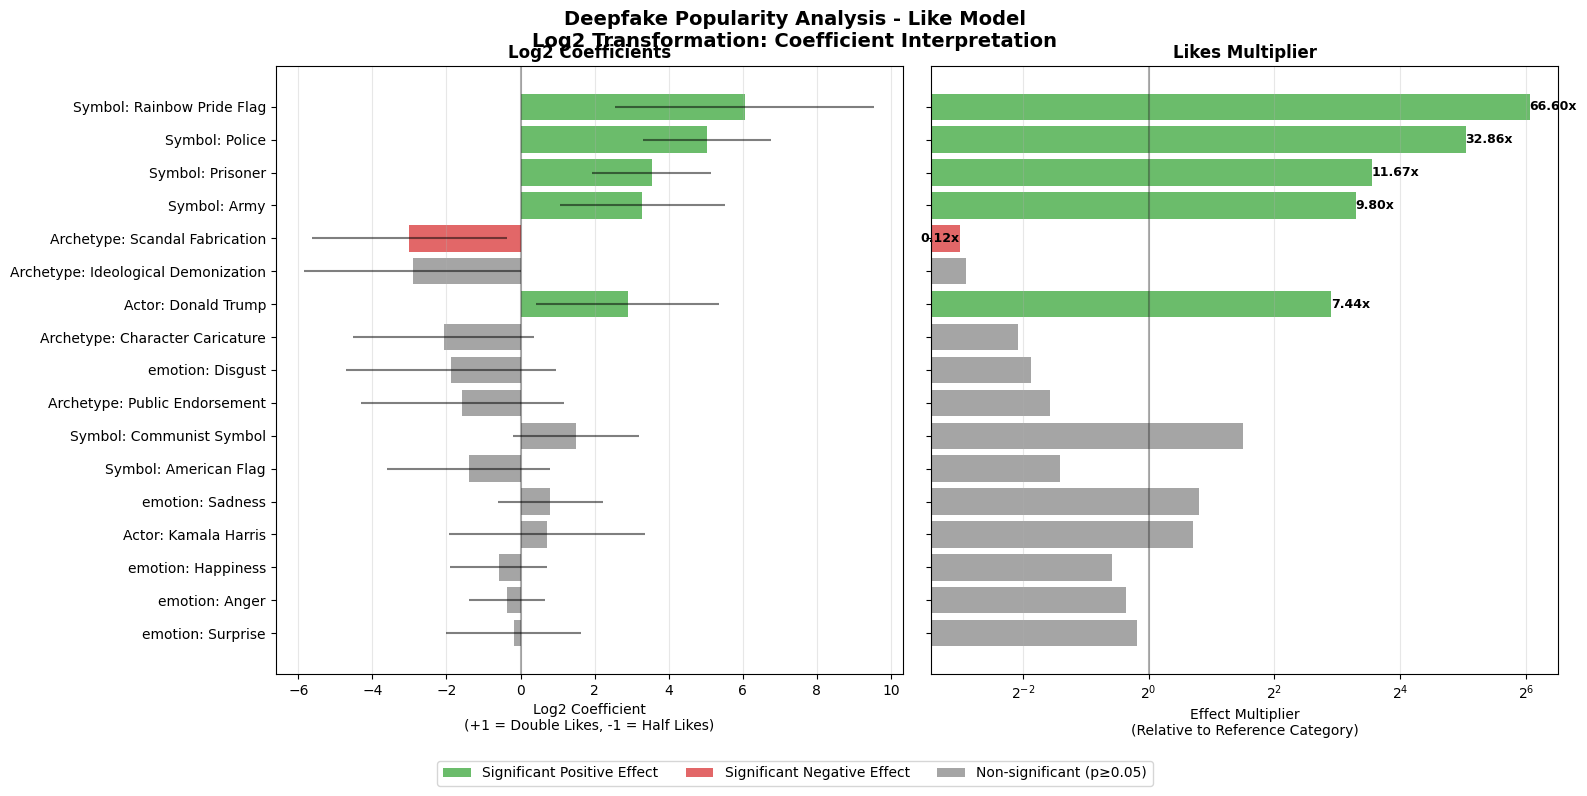


COEFFICIENT INTERPRETATION GUIDE
Log2 Transformation Effects:
• Coefficient of +1.0 → 2x more likes (double)
• Coefficient of +2.0 → 4x more likes (quadruple)
• Coefficient of -1.0 → 0.5x likes (half)
• Coefficient of -2.0 → 0.25x likes (quarter)

Significant Effects (p < 0.05):
• Symbol: Rainbow Pride Flag: increases likes by 66.60x (coef: 6.057)
• Symbol: Police: increases likes by 32.86x (coef: 5.038)
• Symbol: Prisoner: increases likes by 11.67x (coef: 3.545)
• Symbol: Army: increases likes by 9.80x (coef: 3.292)
• Actor: Donald Trump: increases likes by 7.44x (coef: 2.895)
• Archetype: Scandal Fabrication: decreases likes by 0.12x (coef: -3.003)


In [103]:
# Extract coefficients (exclude intercept)
coef_data = vis_model['model'].params[1:]  # Skip intercept
coef_se = vis_model['model'].bse[1:]  # Standard errors
p_values = vis_model['model'].pvalues[1:]

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Variable': coef_data.index,
    'Coefficient': coef_data.values,
    'Std_Error': coef_se.values,
    'P_Value': p_values.values
})

# Add significance indicators and effect size interpretation
plot_df['Significant'] = plot_df['P_Value'] < 0.05
plot_df['Effect_Multiplier'] = 2 ** plot_df['Coefficient']  # Convert log2 coefficient to multiplier
plot_df['Variable_Clean'] = plot_df['Variable'].str.replace('dominant_actor_', 'Actor: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_archetype_', 'Archetype: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_emotion_', 'emotion: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_symbol_', 'Symbol: ')

# Sort by coefficient magnitude
plot_df = plot_df.reindex(plot_df['Coefficient'].abs().sort_values(ascending=True).index)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left plot: Coefficients
# Color based on significance and sign
colors = []
for _, row in plot_df.iterrows():
    if row['Significant']:
        colors.append('#d62728' if row['Coefficient'] < 0 else '#2ca02c')  # Red for negative, green for positive
    else:
        colors.append('#7f7f7f')  # Gray for non-significant

# Create horizontal bar plot
bars = ax1.barh(range(len(plot_df)), plot_df['Coefficient'], color=colors, alpha=0.7)

# Add error bars
ax1.errorbar(plot_df['Coefficient'], range(len(plot_df)),
            xerr=1.96*plot_df['Std_Error'], fmt='none', color='black', alpha=0.5)

# Customize the left plot
ax1.set_yticks(range(len(plot_df)))
ax1.set_yticklabels(plot_df['Variable_Clean'])
ax1.set_xlabel('Log2 Coefficient\n(+1 = Double Likes, -1 = Half Likes)')
ax1.set_title('Log2 Coefficients', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(axis='x', alpha=0.3)

# Right plot: Effect multipliers
# Create horizontal bar plot for multipliers
bars2 = ax2.barh(range(len(plot_df)), plot_df['Effect_Multiplier'], color=colors, alpha=0.7)

# Customize the right plot
ax2.set_yticks(range(len(plot_df)))
ax2.set_yticklabels([])  # No labels on right plot
ax2.set_xlabel('Effect Multiplier\n(Relative to Reference Category)')
ax2.set_title('Likes Multiplier', fontweight='bold')
ax2.axvline(x=1, color='black', linestyle='-', alpha=0.3)  # Reference line at 1x
ax2.grid(axis='x', alpha=0.3)
ax2.set_xscale('log', base=2)  # Log scale for multipliers

# Add multiplier annotations for significant effects
for i, (_, row) in enumerate(plot_df.iterrows()):
    if row['Significant']:
        multiplier_text = f"{row['Effect_Multiplier']:.2f}x"
        ax2.text(row['Effect_Multiplier'], i, multiplier_text,
                va='center', ha='left' if row['Effect_Multiplier'] > 1 else 'right',
                fontsize=9, fontweight='bold')

# Main title
fig.suptitle(f'Deepfake Popularity Analysis - Like Model\n'
            f'Log2 Transformation: Coefficient Interpretation',
            fontsize=14, fontweight='bold', y=0.95)

# Add significance legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ca02c', alpha=0.7, label='Significant Positive Effect'),
    Patch(facecolor='#d62728', alpha=0.7, label='Significant Negative Effect'),
    Patch(facecolor='#7f7f7f', alpha=0.7, label='Non-significant (p≥0.05)')
]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=3)

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.12)

# For saving figure
# plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

# Print interpretation guide
print(f"\n{'='*60}")
print("COEFFICIENT INTERPRETATION GUIDE")
print(f"{'='*60}")
print("Log2 Transformation Effects:")
print("• Coefficient of +1.0 → 2x more likes (double)")
print("• Coefficient of +2.0 → 4x more likes (quadruple)")
print("• Coefficient of -1.0 → 0.5x likes (half)")
print("• Coefficient of -2.0 → 0.25x likes (quarter)")
print("\nSignificant Effects (p < 0.05):")

sig_effects = plot_df[plot_df['Significant']].sort_values('Effect_Multiplier', ascending=False)
for _, row in sig_effects.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"• {row['Variable_Clean']}: {direction} likes by {row['Effect_Multiplier']:.2f}x (coef: {row['Coefficient']:.3f})")


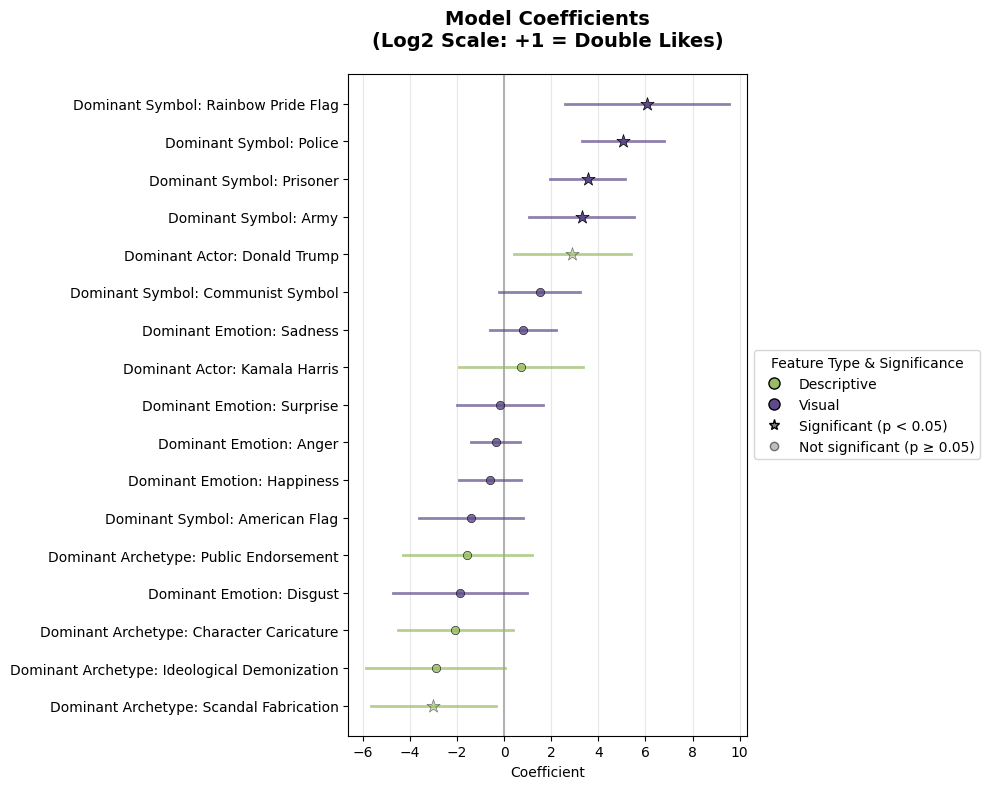


COEFFICIENT INTERPRETATION GUIDE
Log2 Transformation Effects:
• Coefficient of +1.0 → 2x more likes (double)
• Coefficient of +2.0 → 4x more likes (quadruple)
• Coefficient of -1.0 → 0.5x likes (half)
• Coefficient of -2.0 → 0.25x likes (quarter)

Significant Effects (p < 0.05):
• Dominant Symbol: Rainbow Pride Flag: increases likes by 66.60x (coef: 6.057)**
• Dominant Symbol: Police: increases likes by 32.86x (coef: 5.038)**
• Dominant Symbol: Prisoner: increases likes by 11.67x (coef: 3.545)**
• Dominant Symbol: Army: increases likes by 9.80x (coef: 3.292)**
• Dominant Actor: Donald Trump: increases likes by 7.44x (coef: 2.895)*
• Dominant Archetype: Scandal Fabrication: decreases likes by 0.12x (coef: -3.003)*


In [106]:
# Extract coefficients (exclude intercept)
coef_data = vis_model['model'].params[1:]  # Skip intercept
coef_se = vis_model['model'].bse[1:]  # Standard errors
p_values = vis_model['model'].pvalues[1:]

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'Variable': coef_data.index,
    'Coefficient': coef_data.values,
    'Std_Error': coef_se.values,
    'P_Value': p_values.values
})

# Add significance indi:cators and confidence intervals
plot_df['Significant_01'] = plot_df['P_Value'] < 0.01
plot_df['Significant_05'] = plot_df['P_Value'] < 0.05
plot_df['CI_Lower'] = plot_df['Coefficient'] - 1.96 * plot_df['Std_Error']
plot_df['CI_Upper'] = plot_df['Coefficient'] + 1.96 * plot_df['Std_Error']

# Clean variable names and categorize
plot_df['Variable_Clean'] = plot_df['Variable'].str.replace('dominant_actor_', 'Dominant Actor: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_archetype_', 'Dominant Archetype: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_emotion_', 'Dominant Emotion: ')
plot_df['Variable_Clean'] = plot_df['Variable_Clean'].str.replace('dominant_symbol_', 'Dominant Symbol: ')

# Categorize variables for color coding
plot_df['Feature_Type'] = 'Visual'
plot_df.loc[plot_df['Variable'].str.contains('dominant_actor|dominant_archetype'), 'Feature_Type'] = 'Descriptive'
plot_df.loc[plot_df['Variable'].str.contains('dominant_emotion|dominant_symbol'), 'Feature_Type'] = 'Visual'

# Sort by coefficient value (largest to smallest)
plot_df = plot_df.sort_values('Coefficient', ascending=True)

# Create the plot
fig, ax = plt.subplots(figsize=(10, max(8, len(plot_df) * 0.4)))

# Define colors for different feature types
color_map = {'Descriptive': '#97BC62', 'Visual': '#5F4B8B'}

y_positions = range(len(plot_df))

# Plot confidence intervals as horizontal lines
for i, (_, row) in enumerate(plot_df.iterrows()):
    color = color_map[row['Feature_Type']]
    ax.plot([row['CI_Lower'], row['CI_Upper']], [i, i],
            color=color, linewidth=2, alpha=0.7)

# Plot coefficient points
for i, (_, row) in enumerate(plot_df.iterrows()):
    color = color_map[row['Feature_Type']]

    # Choose marker based on significance
    if row['Significant_01']:
        marker = '*'  # Filled star for p < 0.01
        markersize = 10
        alpha = 1.0
    elif row['Significant_05']:
        marker = '*'  # Half-filled star for p < 0.05
        markersize = 10
        alpha = 0.5
    else:
        marker = 'o'  # Circle for non-significant
        markersize = 6
        alpha = 0.8

    ax.scatter(row['Coefficient'], i, c=color, marker=marker,
              s=markersize**2, alpha=alpha, edgecolors='black', linewidth=0.5, zorder=3)

# Customize the plot
ax.set_yticks(y_positions)
ax.set_yticklabels(plot_df['Variable_Clean'])
ax.set_xlabel('Coefficient')
ax.set_title(f'Model Coefficients\n(Log2 Scale: +1 = Double Likes)',
            fontsize=14, fontweight='bold', pad=20)

# Add vertical line at 0
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3, zorder=1)

# Add grid
ax.grid(axis='x', alpha=0.3, zorder=0)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = []

# Feature type legend
for feature_type, color in color_map.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                markerfacecolor=color, markersize=8,
                                label=feature_type, markeredgecolor='black'))

# Significance legend
legend_elements.extend([
    Line2D([0], [0], marker='*', color='w', markerfacecolor='gray',
            markersize=8, label='Significant (p < 0.05)', markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
            markersize=6, alpha=0.5, label='Not significant (p ≥ 0.05)', markeredgecolor='black')
])

# Position legend
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5),
          title='Feature Type & Significance', frameon=True)

plt.tight_layout()

# plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

# Print interpretation guide
print(f"\n{'='*60}")
print("COEFFICIENT INTERPRETATION GUIDE")
print(f"{'='*60}")
print("Log2 Transformation Effects:")
print("• Coefficient of +1.0 → 2x more likes (double)")
print("• Coefficient of +2.0 → 4x more likes (quadruple)")
print("• Coefficient of -1.0 → 0.5x likes (half)")
print("• Coefficient of -2.0 → 0.25x likes (quarter)")
print("\nSignificant Effects (p < 0.05):")

sig_effects = plot_df[plot_df['Significant_05']].sort_values('Coefficient', ascending=False)
for _, row in sig_effects.iterrows():
    multiplier = 2 ** row['Coefficient']
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    significance = "**" if row['Significant_01'] else "*"
    print(f"• {row['Variable_Clean']}: {direction} likes by {multiplier:.2f}x (coef: {row['Coefficient']:.3f}){significance}")
